In [16]:
#Import of Pandas 
import pandas as pd


In [17]:
#Creation of Data as the import from a csv file
data = pd.read_csv('real_estate_valuation_data_set.csv', index_col=0)


In [18]:
#Details of Data
data.shape

(414, 7)

In [19]:
#Summary of the first registers from data
data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Estadísticas descriptivas

In [20]:
#Pandas function to give the statistics of the variables
data.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


# Detalles de los datos de Real Estate:
- Número de registros (filas): 414
- Número de atributos (columnas): 7


Los datos tienen 6 variables descriptivas (con prefijos X) y una variable predictiva (con prefijo Y)
- X1 transaction date: Tiene una $\mu=2013$ y una $\sigma=0.28$
- X2 house age: Tiene una $\mu=17.7$ y una $\sigma=11.39$
- X3 distance to the nearest MRT station: Tiene una $\mu=1083$ y una $\sigma=1262$
- X4 number of convinience stores: Tiene una $\mu=4.09$ y una $\sigma=2.94$
- X5 latitude: Tiene una $\mu=24.96$ y una $\sigma=0.012$
- X6 longitude: Tiene una $\mu=121.53$ y una $\sigma=0.015$ 

### Incluir seaborn para Visualización

In [21]:
import seaborn as sns

In [22]:
%matplotlib inline

### Histogramas por cada variable y dispersión entre variables

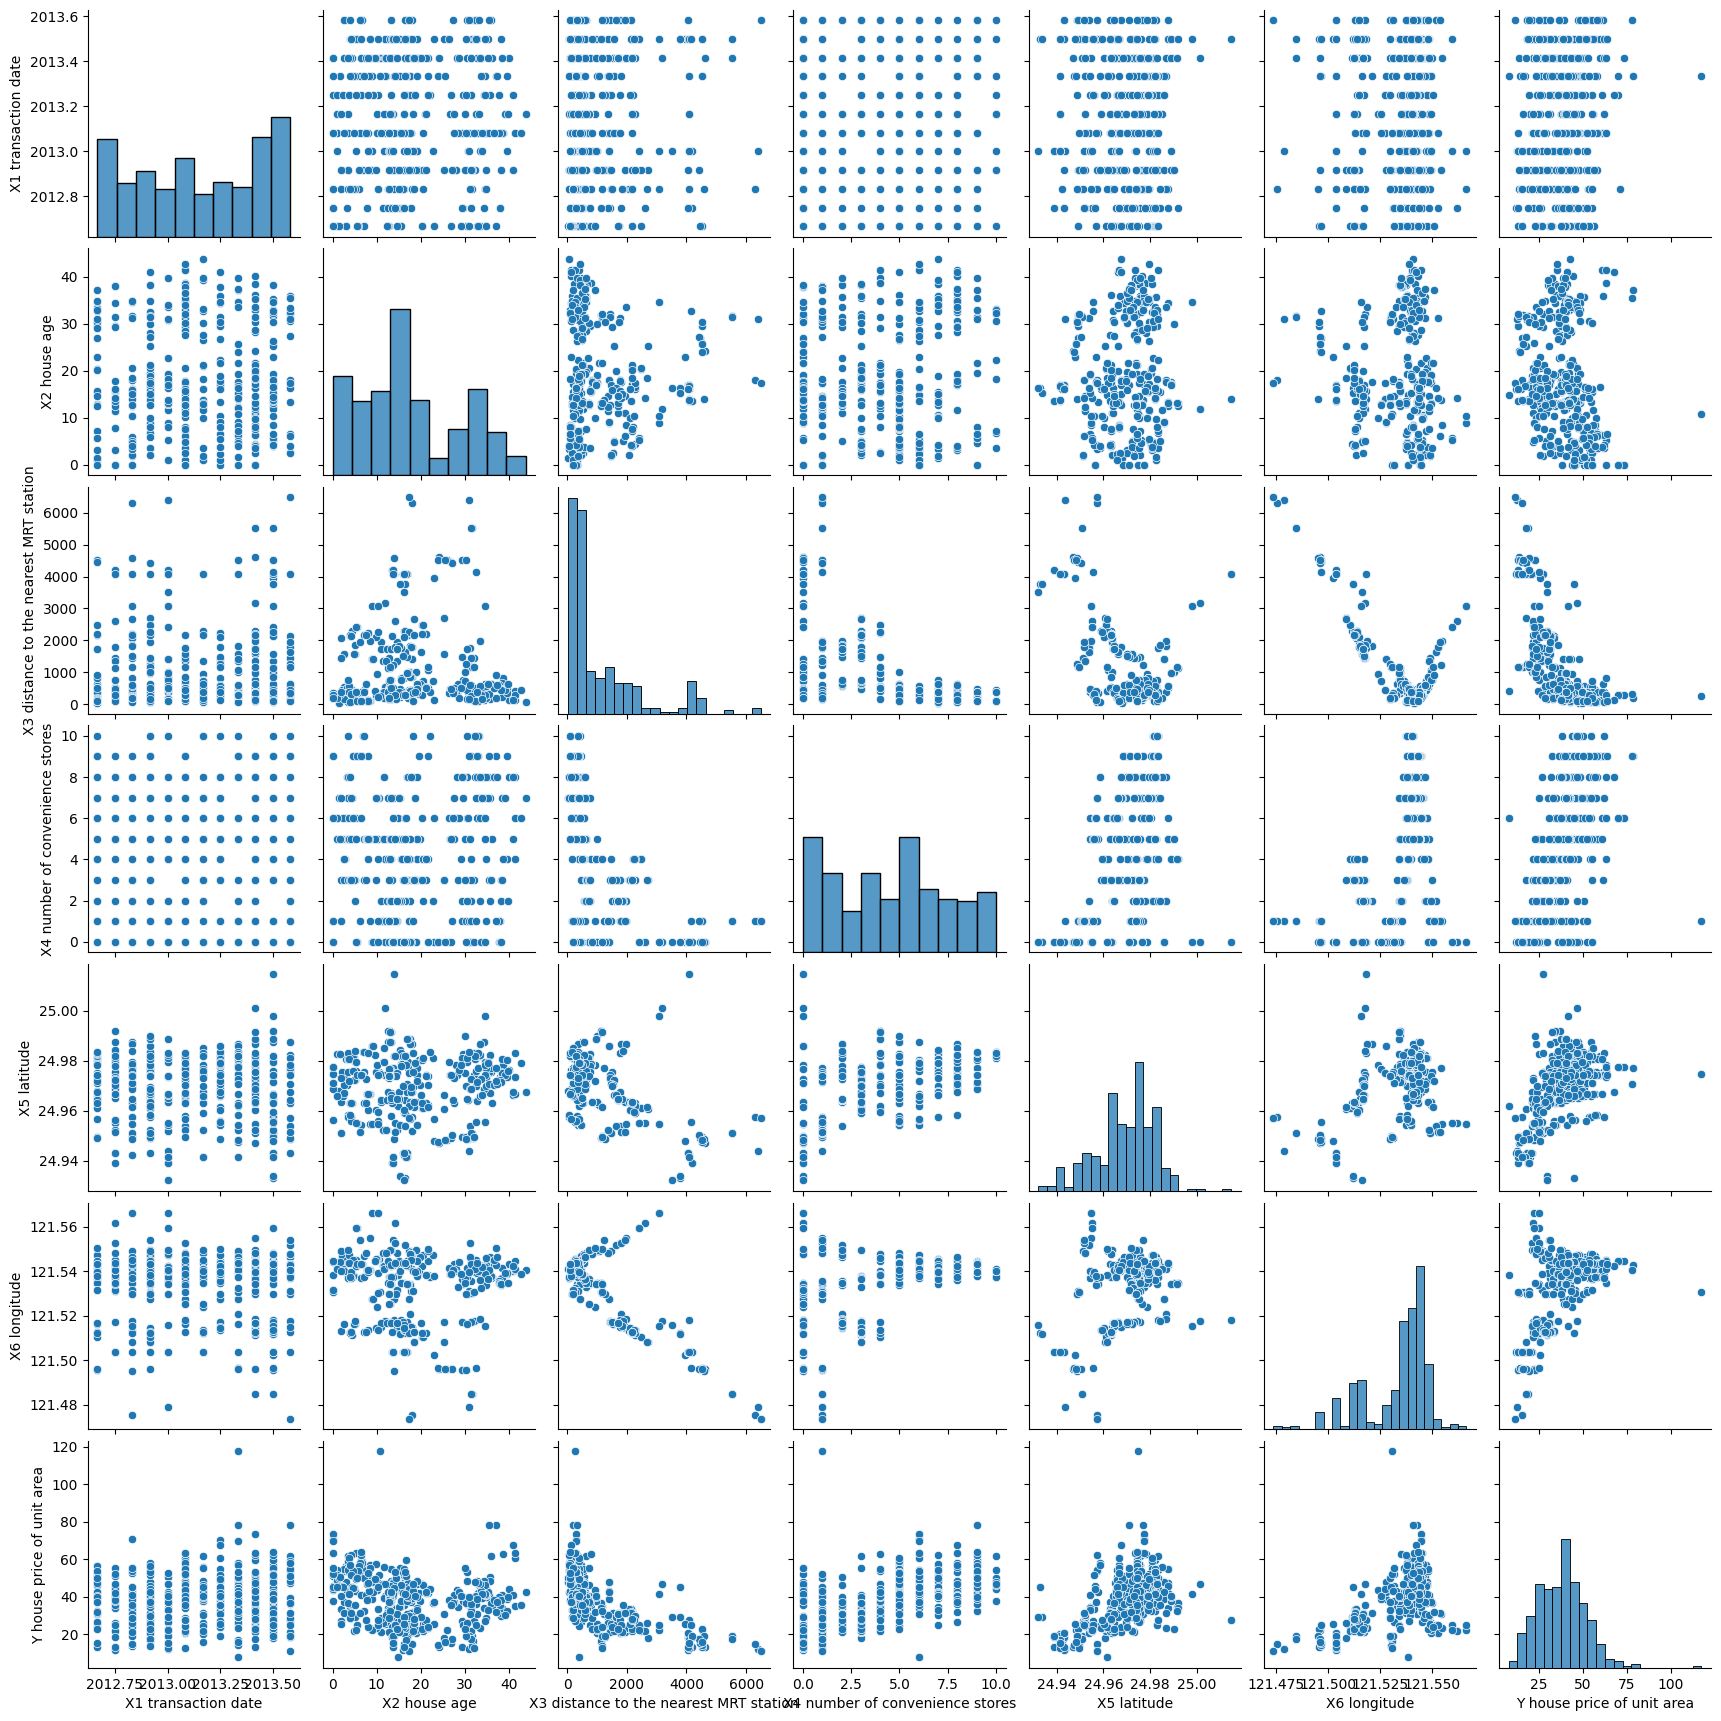

In [23]:
sns.pairplot(data,)

### Matriz de correlación

<Axes: >

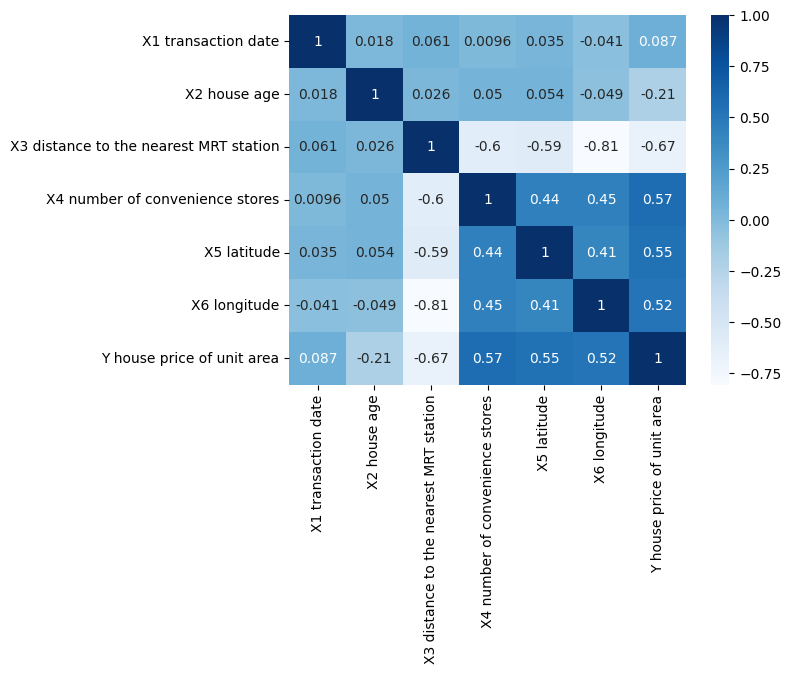

In [24]:
import seaborn as sb
corr = data.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

# Análisis de Correlación

La matriz de correlación muestra la relación lineal que tienen dos variables, teniendo valores entre -1 y 1, siendo los valores negativos (como la variable X3 y la variable Y) relaciones que indican una proporcionalidad inversa y valores de correlación cercano a 1 (positico) como variables directamente proporcioanles (como X5 con Y)

### Diagramas de dispersión y tendencia entre variables de entrada y variable de respuesta

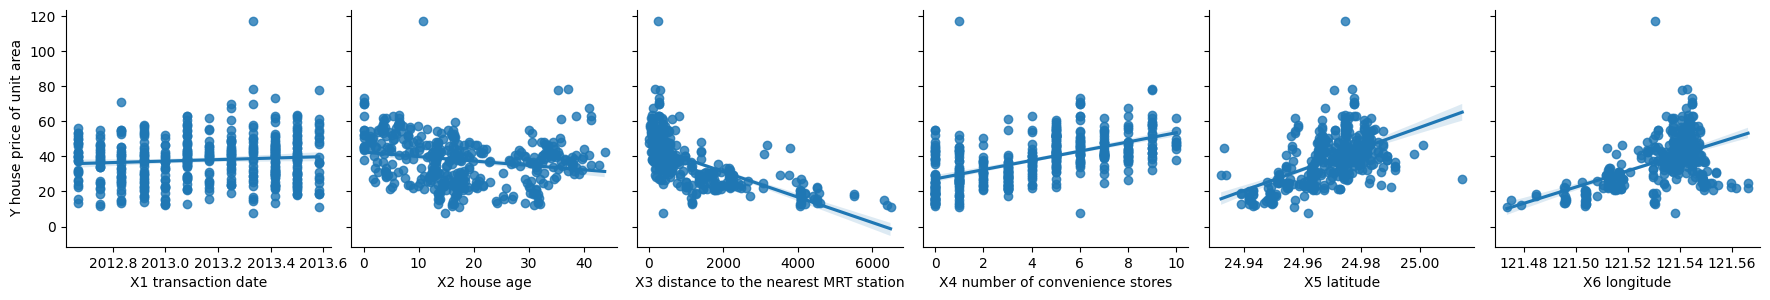

In [25]:
x_variables = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station',
             'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

sns.pairplot(data, x_vars=x_variables, y_vars='Y house price of unit area', height=3, aspect=1, kind='reg')


# Análisis breve de las gráficas

De las gráficas al momento de comparar la relación entre cada una de las variables descriptivas con la variables predictiva (Y), y haciendo uso de la línea de tendencia,se puede observar:
- X1 y Y: se observa que no hay una correlación fuerte entre las variables, también asociado a que los valores están entre 2012.6 y 2013.6 (1 año)
- X2 y Y: se observa una ligera tendencia negativa, de modo que los inmuebles más viejos tienen un menor precio
- X3 y Y: se observa una tendencia negativa marcada del precio con respecto a la distancia al transporte público
- X4 y Y: se evidencia una tendecia creciente del valor del inmueble conforme el número de tiendas aumenta 
- X5 y Y: se evidencia que mayores valores de latitud implican mayores valores del inmueble, por lo que vivir al norte es más caro.
- X6 y Y: se evidencia que mayores valores de longitud implican mayores valores del inmueble, por lo que vivir al oriente es más caro.


### Modelo de regresión 

$y = \beta_0 + \beta_1 \times \text{X1 transaction date} + \beta_2 \times \text{X2 house age} + \beta_3 \times \text{X3 distance to the nearest MRT station}+ \beta_4 \times \text{X4 number of convenience stores}+ \beta_5 \times \text{X5 latitude}+ \beta_6 \times \text{X6 longitude}$

In [26]:
# nombres de características
features = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station',
             'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

# dataframe de características
X = data[features]

X.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
No,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024
2,2012.917,19.5,306.59470,9,24.98034,121.53951
3,2013.583,13.3,561.98450,5,24.98746,121.54391
4,2013.500,13.3,561.98450,5,24.98746,121.54391
5,2012.833,5.0,390.56840,5,24.97937,121.54245


In [27]:
X.shape

(414, 6)

In [28]:
# variable de respuesta
y = data['Y house price of unit area']

y.head()

No
1    37.9
2    42.2
3    47.3
4    54.8
5    43.1
Name: Y house price of unit area, dtype: float64

In [29]:
# tipos de X y y
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### División entre entrenamiento y prueba

In [31]:
from sklearn.model_selection import train_test_split
# sin reordenar los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, shuffle=False)

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
print(X.head())
print(X_train.head())

    X1 transaction date  X2 house age  X3 distance to the nearest MRT station  \
No                                                                              
1              2012.917          32.0                                84.87882   
2              2012.917          19.5                               306.59470   
3              2013.583          13.3                               561.98450   
4              2013.500          13.3                               561.98450   
5              2012.833           5.0                               390.56840   

    X4 number of convenience stores  X5 latitude  X6 longitude  
No                                                              
1                                10     24.98298     121.54024  
2                                 9     24.98034     121.53951  
3                                 5     24.98746     121.54391  
4                                 5     24.98746     121.54391  
5                                 5     24

In [ ]:
# tamaños 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(310, 6)
(310,)
(104, 6)
(104,)


In [ ]:
# volviendo al caso en que cambia el tamaño del conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, shuffle=True,test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression

# crear el objeto del modelo
linreg = LinearRegression()

# ajustar los parámetros del modelo usando los datos de entrenamiento
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# imprimir coeficientes
print(linreg.intercept_)
print(linreg.coef_)

-12796.117684899313
[ 5.71714218e+00 -2.49326467e-01 -4.93769843e-03  1.07614509e+00
  2.27037100e+02 -3.56988335e+01]


In [ ]:
# coeficientes con nombre de las características
list(zip(features, linreg.coef_))

[('X1 transaction date', 5.717142183610284),
 ('X2 house age', -0.24932646689585305),
 ('X3 distance to the nearest MRT station', -0.004937698432022963),
 ('X4 number of convenience stores', 1.076145093445308),
 ('X5 latitude', 227.0371003711649),
 ('X6 longitude', -35.698833465050804)]

### Predicciones usando los datos de prueba

In [ ]:
y_pred = linreg.predict(X_test)

### Evaluar el modelo

**Error absoluto medio**: 

$$\text{MAE} = \frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Error cuadrado medio**: 
$$\text{MSE} = \frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Raíz del Error cuadrado medio**: 
$$\text{RMSE} = \sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [ ]:
from sklearn import metrics

In [ ]:
import numpy as np

# mean absolute error
MAE = metrics.mean_absolute_error(y_test, y_pred)

# mean squared error
MSE = metrics.mean_squared_error(y_test, y_pred)

# root mean squared error
RMSE = np.sqrt(MSE)

In [ ]:
print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

MAE:  5.343030944663055
MSE:  45.01050719519454
RMSE:  6.708987046879323


### Selección de variables - Modelo con otro subconjunto de variables

In [ ]:
# featuresb = ['TV', 'Radio']

# X = data[featuresb]
# y = data.Sales

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# linreg.fit(X_train, y_train)

# y_pred = linreg.predict(X_test)

# MAE = metrics.mean_absolute_error(y_test, y_pred)
# MSE = metrics.mean_squared_error(y_test, y_pred)
# RMSE = np.sqrt(MSE)

# print("MAE: ", MAE)
# print("MSE: ", MSE)
# print("RMSE: ", RMSE)

### Validación cruzada

In [ ]:
from sklearn.model_selection import cross_val_score

# usar MSE - error cuadrático medio
scores = cross_val_score(linreg, X, y, cv=7, scoring='neg_mean_squared_error')
mse_scores = - scores
print(mse_scores)

[ 54.62734667  70.44415322  85.07627645  58.09980055 155.34856284
  59.93088719  69.70921437]


In [ ]:
# calcular RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[ 7.3910315   8.39310153  9.2236802   7.62232252 12.46389036  7.74150419
  8.34920442]


In [ ]:
# RMSE promedio a través de todos los grupos
print(rmse_scores.mean())

8.740676387677743


## Ahora usando statsmodels

In [ ]:
import statsmodels.api as sm

features = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station',
             'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

X = data[features]
y = data['Y house price of unit area']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.543
Model:                                    OLS   Adj. R-squared:                  0.534
Method:                         Least Squares   F-statistic:                     60.00
Date:                        Wed, 07 Feb 2024   Prob (F-statistic):           1.05e-48
Time:                                13:08:56   Log-Likelihood:                -1129.0
No. Observations:                         310   AIC:                             2272.
Df Residuals:                             303   BIC:                             2298.
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

### El segundo modelo, sin X6 Longitude

In [ ]:
import statsmodels.api as sm

featuresb = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station',
             'X4 number of convenience stores', 'X5 latitude']

X2 = data[featuresb]
y2 = data['Y house price of unit area']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=1)

# agregar constante explíticamente
X_train2 = sm.add_constant(X_train2)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model2 = sm.OLS(y_train2, X_train2).fit()

# resumen de resultados
print(model2.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.542
Model:                                    OLS   Adj. R-squared:                  0.535
Method:                         Least Squares   F-statistic:                     72.05
Date:                        Wed, 07 Feb 2024   Prob (F-statistic):           1.46e-49
Time:                                13:56:27   Log-Likelihood:                -1129.2
No. Observations:                         310   AIC:                             2270.
Df Residuals:                             304   BIC:                             2293.
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

### Determinar la influencia de las observaciones

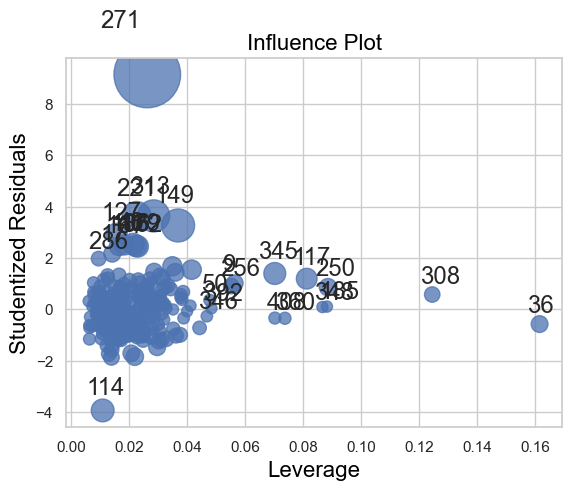

In [ ]:
fig = sm.graphics.influence_plot(model, criterion="cooks")

### Determinar puntos de alta influencia con distancia de Cook y umbral $4/n$

In [ ]:
# disntacia de Cook
model_cooksd = model.get_influence().cooks_distance[0]

# get length of df to obtain n
n = X_train.shape[0]

# umbral
critical_d = 4/n
print('Umbral con distancia de Cook:', critical_d)

# puntos que podrían ser ourliers con alta influencia
out_d = model_cooksd > critical_d

print(X_train.index[out_d], "\n", model_cooksd[out_d])

Umbral con distancia de Cook: 0.012903225806451613
Index([313, 271, 106, 362, 345, 129, 48, 114, 117, 221, 149, 167, 127, 383,
       387],
      dtype='int64', name='No') 
 [0.05308363 0.25267174 0.01647638 0.01975365 0.02088056 0.01954218
 0.01976328 0.02314583 0.01791867 0.04174547 0.05643836 0.01422239
 0.01904198 0.0143794  0.01464915]


In [ ]:
X_train[out_d]

,const,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
No,,,,,,,
313,1.0,2013.583,35.4,318.5292,9,24.97071,121.54069
271,1.0,2013.333,10.8,252.5822,1,24.97460,121.53046
106,1.0,2012.833,0.0,292.9978,6,24.97744,121.54458
362,1.0,2013.083,41.4,281.2050,8,24.97345,121.54093
345,1.0,2013.500,34.6,3085.1700,0,24.99800,121.51550
129,1.0,2013.083,41.3,124.9912,6,24.96674,121.54039
48,1.0,2013.583,35.9,640.7391,3,24.97563,121.53715
114,1.0,2013.333,14.8,393.2606,6,24.96172,121.53812
117,1.0,2013.000,30.9,6396.2830,1,24.94375,121.47883


In [ ]:
y_train[out_d]

No
313     78.0
271    117.5
106     71.0
362     63.3
345     41.2
129     60.7
48      61.5
114      7.6
117     12.2
221     78.3
149     45.1
167     73.6
127     62.9
383     29.3
387     55.3
Name: Y house price of unit area, dtype: float64